In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.columns = train_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
test_data.columns = test_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
train_data.head()

,id,datetime,count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
train_data.shape

(18288, 3)

In [4]:
train_data.isnull().sum()

id          0
datetime    0
count       0
dtype: int64

In [5]:
test_data.isnull().sum()

id          0
datetime    0
dtype: int64

In [6]:
train_data.dtypes

id           int64
datetime    object
count        int64
dtype: object

In [7]:
train_data.nunique()

id          18288
datetime    18288
count         437
dtype: int64

In [8]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'], format = '%d-%m-%Y %H:%M')
test_data['datetime'] = pd.to_datetime(test_data['datetime'], format = '%d-%m-%Y %H:%M')
test_ID = test_data['id'].values
test_data.drop('id', axis = 1)
print(train_data['datetime'].min(), train_data['datetime'].max())

2012-08-25 00:00:00 2014-09-25 23:00:00


In [9]:
train_data.head()

,id,datetime,count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [10]:
train_data = train_data.groupby('datetime')['count'].sum().reset_index()
train_data = train_data.set_index('datetime')
train_data.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=18288, freq=None)

In [11]:
y = train_data['count'].resample('MS').mean()

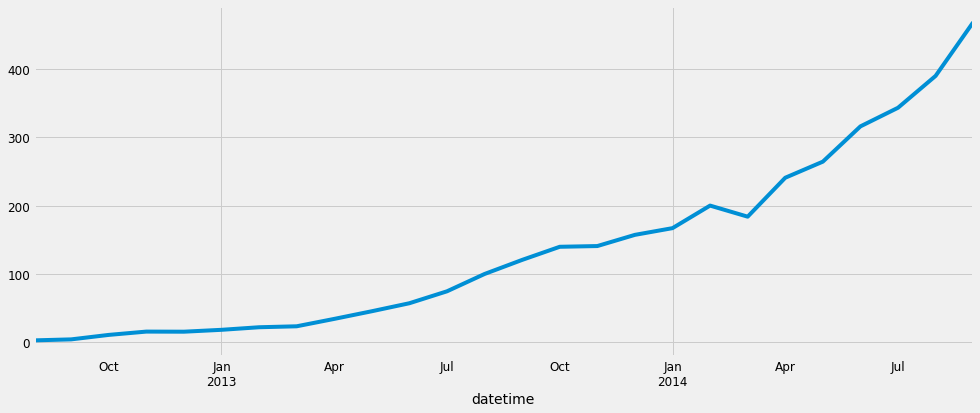

In [12]:
y.plot(figsize=(15, 6))
plt.show()

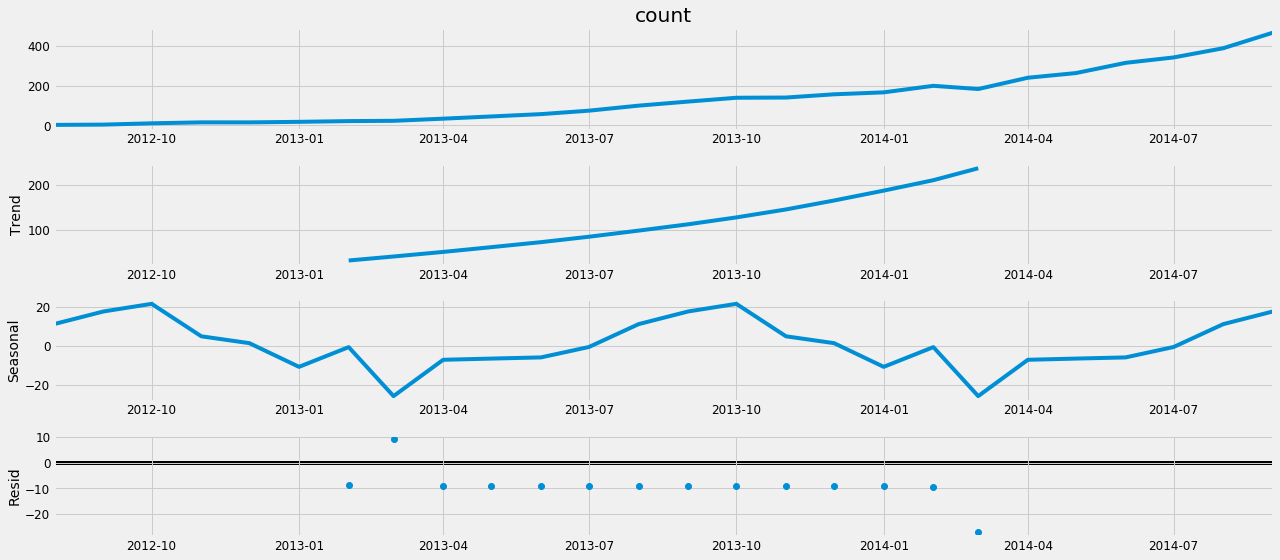

In [13]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:335.8395021290158
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:185.31810895058655
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:21.06611403631466
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:178.0686931547734
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:18.16932784210173
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:15.72640152306143
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 3, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 3, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 3, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 3, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 3, 3, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:165.6416109182064
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:154.4852782924924


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:-6.888920743446729
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5.79213195103571


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-8.626704429139448
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 1, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(1, 3, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 3, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 3, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 3, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:-36.375947727062226


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:-11.061241977316875


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:-4.304884385692688
ARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 1, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(2, 3, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 3, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 3, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(3, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(3, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 2, 1, 12)1

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:325.81732846591217


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:174.57109181334346
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 0, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:153.9419025961952
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 2, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 3, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 3, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 3, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 3, 3, 12)12 - AIC:10.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:167.95641344767844


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:137.04329973876156
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(1, 0, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.704153972732078
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(1, 1, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(1, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(1, 3, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 3, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(1, 3, 3, 12)12 - AIC:12.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:-11.182084218108141


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:-5.188482989024688
ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(2, 0, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(2, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(2, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(2, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(2, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(3, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(3, 0, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(3, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(3, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(3, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(3, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(3, 2, 0

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:8.084791017553531
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(1, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(1, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:-6.271038813961219


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:11.14145689348809
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 0, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(2, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(3, 1, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(3, 1, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(3, 1, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(3, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(3, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:264.964184971453


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:135.62395346818315
ARIMA(0, 0, 3)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(0, 0, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(0, 1, 0, 12)12 - AIC:119.85212132062492
ARIMA(0, 0, 3)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 3)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(0, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 3)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 3)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(0, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(0, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 3)x(0, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 3)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:144.82748013159008


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:109.41006530605172
ARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:16.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(1, 1, 0, 12)12 - AIC:33.25578642092795
ARIMA(0, 0, 3)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 3)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(1, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 3)x(1, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 3, 3, 12)12 - AIC:16.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:-8.39818814918074


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:0.6553483084850384
ARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(2, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(2, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(2, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(2, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(3, 1, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(3, 1, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(3, 1, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(3, 1, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(3, 2

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:-15.187973863531113
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:-6.363646810024383
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 0, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 3, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 3, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 3, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 0, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(3, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:-4.316461719676738
ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(2, 0, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(2, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(2, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(2, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(3, 0, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(3, 0, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(3, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(3, 0, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(3, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(3, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(3, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(3, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(3, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(3, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(3, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(3, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(0, 0, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:92.46843226657847
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(0, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 3)x(0, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:116.90580901524284
ARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:87.89094481458304
ARIMA(0, 1, 3)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(1, 0, 3, 12)12 - AIC:16.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:-4.746437597879195
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(1, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(1, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(1, 3, 3, 12)12 - AIC:16.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(2, 0, 0, 12)12 - AIC:11.072963024745782


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(2, 0, 1, 12)12 - AIC:21.704993790101845
ARIMA(0, 1, 3)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(2, 0, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(2, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(2, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(3, 0, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(3, 0, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(3, 0, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(3, 0, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(3, 1, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(3, 1, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(3, 1, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(3, 1, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(3, 3, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(3, 3, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(3, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(3, 3, 3, 12)12 - AIC:20.0
ARIMA(0, 2, 0)x(0, 0

ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 2)x(2, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 2, 2)x(2, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(2, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 2)x(2, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 2, 2)x(3, 0, 0, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(3, 0, 1, 12)12 - AIC:14.0
ARIMA(0, 2, 2)x(3, 0, 2, 12)12 - AIC:16.0
ARIMA(0, 2, 2)x(3, 0, 3, 12)12 - AIC:18.0
ARIMA(0, 2, 2)x(3, 1, 0, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(3, 1, 1, 12)12 - AIC:14.0
ARIMA(0, 2, 2)x(3, 1, 2, 12)12 - AIC:16.0
ARIMA(0, 2, 2)x(3, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 2, 2)x(3, 2, 0, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(3, 2, 1, 12)12 - AIC:14.0
ARIMA(0, 2, 2)x(3, 2, 2, 12)12 - AIC:16.0
ARIMA(0, 2, 2)x(3, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 2, 2)x(3, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(3, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 2, 2)x(3, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 2, 2)x(3, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 2, 3)x(0, 0, 0, 12)12 - A

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 3)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 3)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 3)x(0, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 2, 3)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 3)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 3)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 3)x(0, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 2, 3)x(0, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 3)x(0, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 3)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 3)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 2, 3)x(1, 0, 0, 12)12 - AIC:109.30010826712584
ARIMA(0, 2, 3)x(1, 0, 1, 12)12 - AIC:76.220936579424
ARIMA(0, 2, 3)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 3)x(1, 0, 3, 12)12 - AIC:16.0
ARIMA(0, 2, 3)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 3)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 3)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 3)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 2, 3)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 3)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 3)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 3)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 2,

ARIMA(0, 3, 2)x(0, 1, 3, 12)12 - AIC:12.0
ARIMA(0, 3, 2)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 3, 2)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 3, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 3, 2)x(0, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 3, 2)x(0, 3, 0, 12)12 - AIC:6.0
ARIMA(0, 3, 2)x(0, 3, 1, 12)12 - AIC:8.0
ARIMA(0, 3, 2)x(0, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 3, 2)x(0, 3, 3, 12)12 - AIC:12.0
ARIMA(0, 3, 2)x(1, 0, 0, 12)12 - AIC:108.90778302483002
ARIMA(0, 3, 2)x(1, 0, 1, 12)12 - AIC:83.57468419045082
ARIMA(0, 3, 2)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 3, 2)x(1, 0, 3, 12)12 - AIC:14.0
ARIMA(0, 3, 2)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 3, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 3, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 3, 2)x(1, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 3, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 3, 2)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 3, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 3, 2)x(1, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 3, 2)x(1, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 3, 2)x(1, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 3, 2)

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 3)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 3, 3)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 3, 3)x(0, 1, 3, 12)12 - AIC:14.0
ARIMA(0, 3, 3)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 3, 3)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 3, 3)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 3, 3)x(0, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 3, 3)x(0, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 3, 3)x(0, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 3, 3)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 3, 3)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 3, 3)x(1, 0, 0, 12)12 - AIC:108.26826279847606
ARIMA(0, 3, 3)x(1, 0, 1, 12)12 - AIC:72.5748933845612
ARIMA(0, 3, 3)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 3, 3)x(1, 0, 3, 12)12 - AIC:16.0
ARIMA(0, 3, 3)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 3, 3)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 3, 3)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 3, 3)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 3, 3)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 3, 3)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 3, 3)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 3, 3)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 3

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:-3.74827156401631
ARIMA(1, 0, 0)x(0, 0, 3, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:116.25882015257942


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-2.841508586783071
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 1, 3, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:nan


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 2, 3, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(0, 3, 0, 12)12 - AIC:4.0
ARIMA(1, 0, 0)x(0, 3, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 3, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 3, 3, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:117.54458768325705
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:118.7238380554063


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:-4.554258214956457
ARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-0.34392017958756327


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-3.8516444338188425
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 1, 3, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 2, 3, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(1, 3, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 3, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 3, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 3, 3, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:-11.67826223206064
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:-0.4036996732347209
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:1.9603242159866738
ARIMA(1, 0, 0)x(2, 0, 3, 12)12 - AIC:14.0
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(2, 1, 3, 12)12 - AIC:14.0
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(2, 2, 3,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:0.21171401132446555
ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 1)x(2, 0, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 1)x(2, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 1)x(2, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 1)x(2, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 1)x(2, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 1)x(3, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 1)x(3, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 0, 1)x(3, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(3, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 1)x(3, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 1)x(3, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 0, 1)x(3, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:93.30981479329927
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(1, 0, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:-0.42638466882830883
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(1, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(1, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:-4.476657351214115
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:3.0603197964010107
ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(2, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(2, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:95.25311186592904
ARIMA(1, 0, 3)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(0, 0, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(0, 1, 0, 12)12 - AIC:90.09044079859451
ARIMA(1, 0, 3)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 3)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(0, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 3)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 3)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(0, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(0, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 3)x(0, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 3)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(0, 3, 3, 12)12 - AIC:16.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:108.35978851609686


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:93.93220340612457
ARIMA(1, 0, 3)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(1, 1, 0, 12)12 - AIC:-3.5213899818791763
ARIMA(1, 0, 3)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 3)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 3)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:-5.783615130852695


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:3.9278574941849786
ARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(1, 0, 3)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(1, 0, 3)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(2, 2, 3, 12)12 - AIC:20.0
ARIMA(1, 0, 3)x(2, 3, 0, 12)12 - AIC:14.0
ARIMA(1, 0, 3)x(2, 3, 1, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(2, 3, 2, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(2, 3, 3, 12)12 - AIC:20.0
ARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(3, 0, 2, 12)12 - AIC:20.0
ARIMA(1, 0, 3)x(3, 0, 3, 12)12 - AIC:22.0
ARIMA(1, 0, 3)x(3, 1, 0, 12)12 - AIC:16.0
ARIMA(1, 0, 3)x(3, 1, 1, 12)12 - AIC:18.0
ARIMA(1, 0, 3)x(3, 1, 2, 12)12 - AIC:20.0
ARIMA(1, 0, 3)x(3, 1, 3, 12)12 - AIC:22.0
ARIMA(1, 0, 3)x(3, 2

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:102.3871686552616
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 0, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 3, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 3, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 3, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 3, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 0, 3, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(2, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(3, 0, 0

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:86.50841115548495
ARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(0, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 3)x(0, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 3)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 3)x(0, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(1, 0, 0, 12)12 - AIC:110.21580324210744


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(1, 0, 1, 12)12 - AIC:86.61621772773915
ARIMA(1, 1, 3)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 1, 3)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 3)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 3)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(1, 1, 3)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(1, 1, 3)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(1, 1, 3)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(1, 1, 3)x(2, 3, 0, 12)12 - AIC:14.0
ARIMA(1, 1, 3)x(2, 3, 1, 12)12 - AIC:16.0
ARIMA(1, 1, 3)x(2, 3, 2, 12)12 - AIC:18.0
ARIMA(1, 1, 3)x(2, 3, 3, 12)12 - AIC:20.0
ARIMA(1, 1, 3)x(3, 0,

ARIMA(1, 2, 2)x(1, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(1, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 2, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 2)x(2, 3, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 3, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 2)x(3, 0, 0, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(3, 0, 1, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(3, 0, 2, 12)12 - AIC:18.0
ARIMA(1, 2, 2)x(3, 0, 3, 12)12 - A

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 2, 3)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 3)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(0, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 3)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 3)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(0, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(0, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 3)x(0, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 3)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(0, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(1, 0, 0, 12)12 - AIC:102.05828644281361


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(1, 0, 1, 12)12 - AIC:78.42476103392774
ARIMA(1, 2, 3)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 3)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 3)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 3)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 2)x(1, 0, 1, 12)12 - AIC:81.51863459230532
ARIMA(1, 3, 2)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(1, 0, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 3, 2)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 3, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 3, 2)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 3, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(1, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 3, 2)x(1, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 3, 2)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(1, 3, 2)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(2, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 3, 2)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(2, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 3, 3)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 3, 3)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 3)x(0, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 3)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 3, 3)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 3, 3)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 3)x(0, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 3)x(0, 3, 0, 12)12 - AIC:10.0
ARIMA(1, 3, 3)x(0, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 3, 3)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 3)x(0, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 3)x(1, 0, 0, 12)12 - AIC:97.95542021990909
ARIMA(1, 3, 3)x(1, 0, 1, 12)12 - AIC:72.13003004744985
ARIMA(1, 3, 3)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 3)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 3)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 3, 3)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 3)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 3)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 3)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 3, 3)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 3)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:115.74277010248227


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:-0.9311087571086976
ARIMA(2, 0, 0)x(0, 0, 3, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:103.46256755857404
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:-0.9708436904434858
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(0, 1, 3, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(0, 2, 3, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(0, 3, 0, 12)12 - AIC:6.0
ARIMA(2, 0, 0)x(0, 3, 1, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(0, 3, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(0, 3, 3, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:104.49821356360933
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:106.49836761540976


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:1.070180255762498
ARIMA(2, 0, 0)x(1, 0, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(1, 1, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(1, 2, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(1, 3, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(1, 3, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(1, 3, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(1, 3, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 0, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 1, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 2, 1,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:110.49877873498161
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 0, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:103.49686290741585
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 1, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 2, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 3, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 1)x(0, 3, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:100.8342727124226


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:102.29929593152819
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 0, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(1, 3, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 3, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 0, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 1)x(2, 2

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:104.88230239819566
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:97.82859441853024
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 1, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 2, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 3, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 3, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 3, 3, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:113.98462920201672


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:97.94535408679243
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(2, 0, 2)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(0, 1, 0, 12)12 - AIC:92.70343305815356
ARIMA(2, 0, 3)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 3)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 3)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 3)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(0, 2, 3, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 3)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 3)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(0, 3, 3, 12)12 - AIC:18.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:106.88724194703391


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:92.9354543164229
ARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(2, 0, 3)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 3)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(2, 0, 3)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 3)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(2, 0, 3)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 3)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(2, 0, 3)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(2, 0, 3)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(2, 0, 3)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(2, 0, 3)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(2, 0, 3)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(2, 0, 3)x(2, 2, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:103.88756621800412
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 0, 3, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(1, 3, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(1, 3, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(2, 0, 3, 12)12 - AIC:18.0
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 1, 1)x(2, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(2, 1, 1)x(3, 0

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 3)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 3)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 3)x(0, 3, 3, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(1, 0, 0, 12)12 - AIC:104.60479294078024


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 0, 1, 12)12 - AIC:88.60976872105401
ARIMA(2, 1, 3)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 3)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 3)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(2, 1, 3)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(2, 3, 0, 12)12 - AIC:16.0
ARIMA(2, 1, 3)x(2, 3, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(2, 3, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(2, 3, 3, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(3, 0,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:93.78950862740501
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:87.54343579148481
ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 2)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 3)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 3)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 3)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(0, 2, 3, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 3)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 3)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(0, 3, 3, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(1, 0, 0, 12)12 - AIC:95.06890240050618


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(1, 0, 1, 12)12 - AIC:80.12672376747665
ARIMA(2, 2, 3)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 3)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 3)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 3)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 3)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 3)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 3)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 3)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(2, 2, 3)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(2, 2, 3)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(2, 2, 3)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(2, 2, 3)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(2, 2, 3)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(2, 2, 3)x(2, 2,

ARIMA(2, 3, 2)x(1, 0, 1, 12)12 - AIC:82.86203878414591
ARIMA(2, 3, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 2)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 2)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 2)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 2)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 2)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 2)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 2)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 2)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 2)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(2, 3, 3)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 3)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 3)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 3)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(0, 2, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 3)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 3)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(0, 3, 3, 12)12 - AIC:18.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(1, 0, 0, 12)12 - AIC:90.01991320098972


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(1, 0, 1, 12)12 - AIC:74.7941421306226
ARIMA(2, 3, 3)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 3)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 3, 3)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 3)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 3, 3)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 3)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(2, 3, 3)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 3)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(2, 3, 3)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(2, 3, 3)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(2, 3, 3)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(2, 3, 3)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(2, 3, 3)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(2, 3, 3)x(2, 2, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(0, 0, 2, 12)12 - AIC:-8.062938240797312
ARIMA(3, 0, 0)x(0, 0, 3, 12)12 - AIC:14.0
ARIMA(3, 0, 0)x(0, 1, 0, 12)12 - AIC:96.75700693873887


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(0, 1, 1, 12)12 - AIC:1.4785193422630183
ARIMA(3, 0, 0)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(3, 0, 0)x(0, 1, 3, 12)12 - AIC:14.0
ARIMA(3, 0, 0)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(3, 0, 0)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(3, 0, 0)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(3, 0, 0)x(0, 2, 3, 12)12 - AIC:14.0
ARIMA(3, 0, 0)x(0, 3, 0, 12)12 - AIC:8.0
ARIMA(3, 0, 0)x(0, 3, 1, 12)12 - AIC:10.0
ARIMA(3, 0, 0)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(3, 0, 0)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:97.17840401881787
ARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:99.1784042946627
ARIMA(3, 0, 0)x(1, 0, 2, 12)12 - AIC:3.6721810453816452
ARIMA(3, 0, 0)x(1, 0, 3, 12)12 - AIC:16.0
ARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(3, 0, 0)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(3, 0, 0)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(3, 0, 0)x(1, 1, 3, 12)12 - AIC:16.0
ARIMA(3, 0, 0)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(3, 0, 0)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(3, 0, 0)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(3, 0, 0)x(1, 2, 3, 

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:112.55455505197592
ARIMA(3, 0, 1)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(0, 0, 3, 12)12 - AIC:16.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(0, 1, 0, 12)12 - AIC:97.75834021246781
ARIMA(3, 0, 1)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(3, 0, 1)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(0, 1, 3, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(3, 0, 1)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(3, 0, 1)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(0, 2, 3, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(0, 3, 0, 12)12 - AIC:10.0
ARIMA(3, 0, 1)x(0, 3, 1, 12)12 - AIC:12.0
ARIMA(3, 0, 1)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(0, 3, 3, 12)12 - AIC:16.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:97.2757908638682


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:98.53181218115289
ARIMA(3, 0, 1)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(3, 0, 1)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(3, 0, 1)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(3, 0, 1)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 0, 1)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(3, 0, 1)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(3, 0, 1)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 1)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 1)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 0, 1)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 1)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 1)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 1)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:106.23686986841584
ARIMA(3, 0, 2)x(0, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(0, 0, 3, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(0, 1, 0, 12)12 - AIC:99.66636719798026
ARIMA(3, 0, 2)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 0, 2)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 0, 2)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 0, 2)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(0, 2, 3, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(3, 0, 2)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(3, 0, 2)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(0, 3, 3, 12)12 - AIC:18.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:97.77301976336797


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:98.76907893973241
ARIMA(3, 0, 2)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 2)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 0, 2)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 2)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 0, 2)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 2)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 0, 2)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 0, 2)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 0, 2)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 0, 2)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 0, 2)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 0, 2)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 0, 2)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:189.66852158135598


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:99.73983745990427
ARIMA(3, 0, 3)x(0, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(0, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(0, 1, 0, 12)12 - AIC:nan

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(3, 0, 3)x(0, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 3)x(0, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(0, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(0, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 0, 3)x(0, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 3)x(0, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(0, 2, 3, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(0, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 0, 3)x(0, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 0, 3)x(0, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(0, 3, 3, 12)12 - AIC:20.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:96.61094812178641


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:94.48069417740447
ARIMA(3, 0, 3)x(1, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(1, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 0, 3)x(1, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 0, 3)x(1, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(1, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 0, 3)x(1, 2, 0, 12)12 - AIC:16.0
ARIMA(3, 0, 3)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(1, 2, 3, 12)12 - AIC:22.0
ARIMA(3, 0, 3)x(1, 3, 0, 12)12 - AIC:16.0
ARIMA(3, 0, 3)x(1, 3, 1, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(1, 3, 2, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(1, 3, 3, 12)12 - AIC:22.0
ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(2, 0, 2, 12)12 - AIC:22.0
ARIMA(3, 0, 3)x(2, 0, 3, 12)12 - AIC:24.0
ARIMA(3, 0, 3)x(2, 1, 0, 12)12 - AIC:18.0
ARIMA(3, 0, 3)x(2, 1, 1, 12)12 - AIC:20.0
ARIMA(3, 0, 3)x(2, 1, 2, 12)12 - AIC:22.0
ARIMA(3, 0, 3)x(2, 1, 3, 12)12 - AIC:24.0
ARIMA(3, 0, 3)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:94.50912813538241
ARIMA(3, 1, 2)x(0, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(0, 0, 3, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:90.89329528569712
ARIMA(3, 1, 2)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(3, 1, 2)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(0, 3, 3, 12)12 - AIC:18.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:93.358908024026


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 0, 1, 12)12 - AIC:95.42216934605051
ARIMA(3, 1, 2)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(2, 3, 0, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(2, 3, 1, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(2, 3, 2, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(2, 3, 3, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(3, 0,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(3, 1, 3)x(0, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 3)x(0, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 3)x(0, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(0, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 1, 3)x(0, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 3)x(0, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 3)x(0, 3, 3, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(1, 0, 0, 12)12 - AIC:95.32256319618737


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 0, 1, 12)12 - AIC:88.26744002572842
ARIMA(3, 1, 3)x(1, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(1, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 1, 3)x(1, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 1, 3)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(1, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 1, 3)x(1, 3, 0, 12)12 - AIC:16.0
ARIMA(3, 1, 3)x(1, 3, 1, 12)12 - AIC:18.0
ARIMA(3, 1, 3)x(1, 3, 2, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(1, 3, 3, 12)12 - AIC:22.0
ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:18.0
ARIMA(3, 1, 3)x(2, 0, 1, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(2, 0, 2, 12)12 - AIC:22.0
ARIMA(3, 1, 3)x(2, 0, 3, 12)12 - AIC:24.0
ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:18.0
ARIMA(3, 1, 3)x(2, 1, 1, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(2, 1, 2, 12)12 - AIC:22.0
ARIMA(3, 1, 3)x(2, 1, 3, 12)12 - AIC:24.0
ARIMA(3, 1, 3)x(2, 3, 0, 12)12 - AIC:18.0
ARIMA(3, 1, 3)x(2, 3, 1, 12)12 - AIC:20.0
ARIMA(3, 1, 3)x(2, 3, 2, 12)12 - AIC:22.0
ARIMA(3, 1, 3)x(2, 3, 3, 12)12 - AIC:24.0
ARIMA(3, 1, 3)x(3, 0,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 1)x(1, 0, 1, 12)12 - AIC:89.10026909024076
ARIMA(3, 2, 1)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 1)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(3, 2, 1)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 2, 1)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 1)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 2, 1)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 2, 1)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 1)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(3, 2, 1)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(3, 2, 1)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 1)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(3, 2, 1)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 1)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 2, 1)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 1)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(0, 0, 1, 12)12 - AIC:96.48024207468016
ARIMA(3, 2, 2)x(0, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(0, 0, 3, 12)12 - AIC:18.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(0, 1, 0, 12)12 - AIC:90.56839488853689
ARIMA(3, 2, 2)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 2, 2)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 2, 2)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 2, 2)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(0, 2, 3, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(3, 2, 2)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(3, 2, 2)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(0, 3, 3, 12)12 - AIC:18.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(1, 0, 0, 12)12 - AIC:86.98221081099257


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(1, 0, 1, 12)12 - AIC:89.09628266463686
ARIMA(3, 2, 2)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 2)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 2, 2)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 2)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 2, 2)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 2)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 2, 2)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 2)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 2)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 2)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 2, 2)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 2)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 2)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 2)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(3, 2, 3)x(0, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 3)x(0, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(0, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(0, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 2, 3)x(0, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 3)x(0, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(0, 2, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(0, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 2, 3)x(0, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 2, 3)x(0, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(0, 3, 3, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(1, 0, 0, 12)12 - AIC:85.44483481903762


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(1, 0, 1, 12)12 - AIC:78.68357640232594
ARIMA(3, 2, 3)x(1, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(1, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 3)x(1, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 2, 3)x(1, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(1, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 3)x(1, 2, 0, 12)12 - AIC:16.0
ARIMA(3, 2, 3)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(1, 2, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 3)x(1, 3, 0, 12)12 - AIC:16.0
ARIMA(3, 2, 3)x(1, 3, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(1, 3, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(1, 3, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 3)x(2, 0, 0, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(2, 0, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(2, 0, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 3)x(2, 0, 3, 12)12 - AIC:24.0
ARIMA(3, 2, 3)x(2, 1, 0, 12)12 - AIC:18.0
ARIMA(3, 2, 3)x(2, 1, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 3)x(2, 1, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 3)x(2, 1, 3, 12)12 - AIC:24.0
ARIMA(3, 2, 3)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 1)x(1, 0, 1, 12)12 - AIC:85.18823249370836
ARIMA(3, 3, 1)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 3, 1)x(1, 0, 3, 12)12 - AIC:18.0
ARIMA(3, 3, 1)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(3, 3, 1)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 3, 1)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 3, 1)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(3, 3, 1)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 3, 1)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 3, 1)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 3, 1)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(3, 3, 1)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(3, 3, 1)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(3, 3, 1)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(3, 3, 1)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(3, 3, 1)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(3, 3, 1)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 1)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 1)x(2, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 1)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 3, 1)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 1)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 1)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 1)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(3, 3, 2)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 3, 2)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(0, 1, 3, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 3, 2)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 3, 2)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(0, 2, 3, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(0, 3, 0, 12)12 - AIC:12.0
ARIMA(3, 3, 2)x(0, 3, 1, 12)12 - AIC:14.0
ARIMA(3, 3, 2)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(0, 3, 3, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(1, 0, 0, 12)12 - AIC:81.90546659707711


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(1, 0, 1, 12)12 - AIC:84.93411015017332
ARIMA(3, 3, 2)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(1, 0, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 2)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 3, 2)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 2)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 3, 2)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 2)x(1, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 3, 2)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 2)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 3, 2)x(2, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 3, 2)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 3, 2)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 3, 2)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 3, 2)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 3, 2)x(2, 2,

C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(3, 3, 3)x(0, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 3)x(0, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(0, 1, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(0, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 3, 3)x(0, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 3)x(0, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(0, 2, 3, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(0, 3, 0, 12)12 - AIC:14.0
ARIMA(3, 3, 3)x(0, 3, 1, 12)12 - AIC:16.0
ARIMA(3, 3, 3)x(0, 3, 2, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(0, 3, 3, 12)12 - AIC:20.0


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(1, 0, 0, 12)12 - AIC:83.94731397971455


C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(1, 0, 1, 12)12 - AIC:77.61969170520354
ARIMA(3, 3, 3)x(1, 0, 2, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(1, 0, 3, 12)12 - AIC:22.0
ARIMA(3, 3, 3)x(1, 1, 0, 12)12 - AIC:16.0
ARIMA(3, 3, 3)x(1, 1, 1, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(1, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 3, 3)x(1, 2, 0, 12)12 - AIC:16.0
ARIMA(3, 3, 3)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(1, 2, 3, 12)12 - AIC:22.0
ARIMA(3, 3, 3)x(1, 3, 0, 12)12 - AIC:16.0
ARIMA(3, 3, 3)x(1, 3, 1, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(1, 3, 2, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(1, 3, 3, 12)12 - AIC:22.0
ARIMA(3, 3, 3)x(2, 0, 0, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(2, 0, 1, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(2, 0, 2, 12)12 - AIC:22.0
ARIMA(3, 3, 3)x(2, 0, 3, 12)12 - AIC:24.0
ARIMA(3, 3, 3)x(2, 1, 0, 12)12 - AIC:18.0
ARIMA(3, 3, 3)x(2, 1, 1, 12)12 - AIC:20.0
ARIMA(3, 3, 3)x(2, 1, 2, 12)12 - AIC:22.0
ARIMA(3, 3, 3)x(2, 1, 3, 12)12 - AIC:24.0
ARIMA(3, 3, 3)x(2, 2,

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3137      0.361      0.869      0.385      -0.394       1.021
ar.L2          0.7639      0.456      1.675      0.094      -0.130       1.658
ma.L1         -1.0000      0.786     -1.273      0.203      -2.540       0.540
ar.S.L12       1.8449      1.025      1.799      0.072      -0.165       3.855
sigma2       198.3037      0.004   5.01e+04      0.000     198.296     198.311


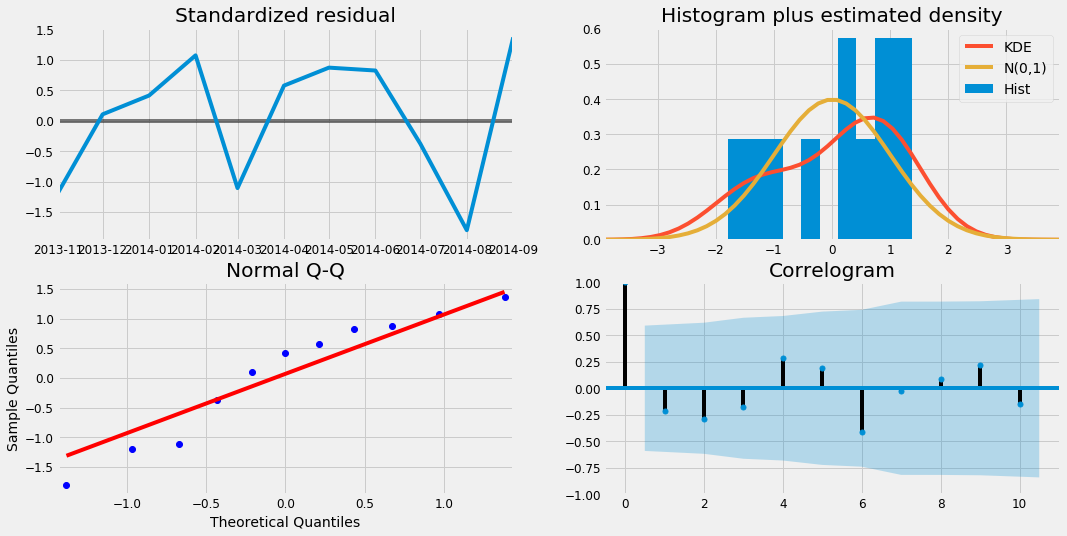

In [52]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = (2, 1, 1),
                                seasonal_order = (1, 0, 0, 12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize = (16, 8))
plt.show()

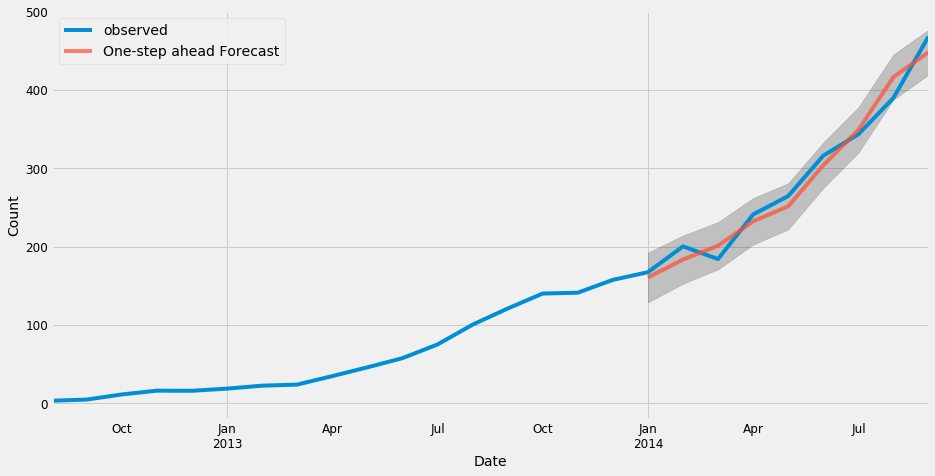

In [53]:
pred = results.get_prediction(start = pd.to_datetime('2014-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2012':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()
plt.show()

In [54]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 240.5
The Root Mean Squared Error of our forecasts is 15.51


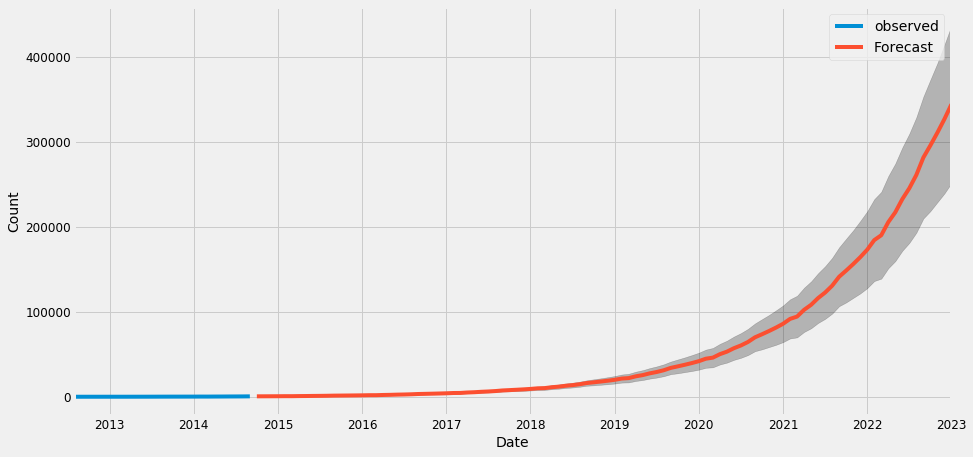

In [55]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()
plt.show()